In [ ]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


**Dataset:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Algorithm:** SVM 

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

data = read_csv(url, header=None)

data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
print(data[6].unique())
data = data.replace('?', np.nan)
data[6] = pd.to_numeric(data[6])
data[6] = data[6].fillna(data[6].median())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [ ]:
print(data[6].unique())

[ 1. 10.  2.  4.  3.  9.  7.  5.  8.  6.]


In [ ]:
X = data.iloc[:, 1:9]
y = data.iloc[:, 10:11]

X

,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1.0,3,1
1,5,4,4,5,7,10.0,3,2
2,3,1,1,1,2,2.0,3,1
3,6,8,8,1,3,4.0,3,7
4,4,1,1,3,2,1.0,3,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1
695,2,1,1,1,2,1.0,1,1
696,5,10,10,3,7,3.0,8,10
697,4,8,6,4,3,4.0,10,6


In [ ]:
y

,10
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

#encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
#X = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
X

,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1.0,3,1
1,5,4,4,5,7,10.0,3,2
2,3,1,1,1,2,2.0,3,1
3,6,8,8,1,3,4.0,3,7
4,4,1,1,3,2,1.0,3,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1
695,2,1,1,1,2,1.0,1,1
696,5,10,10,3,7,3.0,8,10
697,4,8,6,4,3,4.0,10,6


In [ ]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
# Define the XGBoost parameters
params = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

In [ ]:
from deap import base
from deap import creator
from deap import tools
import random

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
# fill in the with random floats for each type of hyper parameter
toolbox.register("h1", random.randint,0,2)
toolbox.register("h2", random.randint,0,2)
toolbox.register("h3", random.uniform,0,1)
toolbox.register("h4", random.randint,0,2)

toolbox.register("IndividualCreator",tools.initCycle,creator.Individual,
                 (toolbox.h1,toolbox.h2,toolbox.h3,toolbox.h4),n=1)

In [ ]:
def getParams(individual):
    C = [0.1, 1.0, 10.0][round(individual[0])]
    kernel =  ['linear', 'poly', 'rbf'][round(individual[1])] 
    gamma = ['scale', 'auto'][round(individual[2])]
    degree = [2,3,4][round(individual[3])]
    return C, kernel, gamma,degree

In [ ]:
# Test IndividualCreator
for i in range(10):
    a = toolbox.IndividualCreator()
    b = getParams(a)
    print(a, b)

[1, 0, 0.859936745225897, 1] (1.0, 'linear', 'auto', 3)
[1, 0, 0.5517541800565845, 2] (1.0, 'linear', 'auto', 4)
[0, 0, 0.903135594344574, 0] (0.1, 'linear', 'auto', 2)
[1, 2, 0.11208155962153987, 2] (1.0, 'rbf', 'scale', 4)
[0, 0, 0.17811530126812436, 2] (0.1, 'linear', 'scale', 4)
[0, 2, 0.9609118656547774, 0] (0.1, 'rbf', 'auto', 2)
[0, 0, 0.9463104828738287, 0] (0.1, 'linear', 'auto', 2)
[2, 2, 0.1991751224623981, 2] (10.0, 'rbf', 'scale', 4)
[1, 1, 0.14876493261284196, 0] (1.0, 'poly', 'scale', 2)
[2, 1, 0.012126270807728878, 2] (10.0, 'poly', 'scale', 4)


In [ ]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

def getAccuracy(individual):
    C, kernel, gamma,degree = getParams(individual)
    classifier = svm.SVC(C=C,
                                  kernel=kernel,
                                  gamma=gamma,
                                  degree=degree)

    cv_results = model_selection.cross_val_score(classifier,
                                                 X,
                                                 y,
                                                 cv=kfold,
                                                 scoring='accuracy')
    return cv_results.mean()

In [ ]:
# Get the accuracy from default hyper-parameters setup

# objective = 'binary:logistic'
# eval_metric = None
# eta = 0.1
# max_depth = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
classifier = svm.SVC()
cv_results = model_selection.cross_val_score(classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('mean: ',cv_results.mean())

mean:  0.9694805194805195


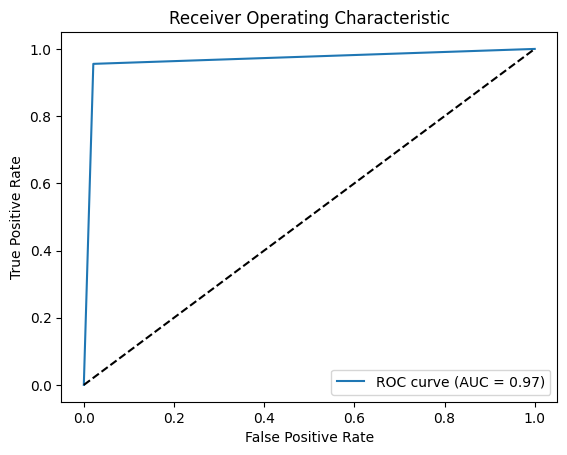

AUC: 0.97


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classifier.fit(X_train,y_train)

# Make predictions using your trained model
y_pred = classifier.predict(X_test)  # This gives the predicted class labels

# Now you have the true labels and predicted probabilities/scores
y_true = y_test  # True labels from the test data

# Assuming you have the predicted probabilities or scores in `y_scores` and true labels in `y_true`
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Printing the AUC score
print('AUC: %0.2f' % roc_auc)

In [ ]:
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, 
                 toolbox.IndividualCreator)
# fitness calculation
def classificationAccuracy(individual):
    return getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=1.0, low=[0, 0, 0, 0], up=[2, 2, 1, 2], indpb=0.3)
#toolbox.register("mutate", tools.mutFlipBit, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
individual = [2, 0, 0.41245413088983973, 3]
toolbox.mutate(individual)

([2, 0, 0.41245413088983973, 3],)

In [ ]:
from deap import algorithms

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.5   # probability for mutating an individual
MAX_GENERATIONS = 5
HALL_OF_FAME_SIZE = 5

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("params = ", hof.items[0], getParams(hof.items[0]))
print("Accuracy = %1.5f" % hof.items[0].fitness.values[0])

gen	nevals	max     	avg     
0  	20    	0.969938	0.962925
1  	20    	0.969938	0.967289
2  	18    	0.969938	0.967224
3  	19    	0.969938	0.969007
4  	19    	0.969938	0.967292
5  	19    	0.969938	0.966076
- Best solution is: 
params =  [1.4268185095792703, 2, 0.4485847788966092, 1] (1.0, 'rbf', 'scale', 3)
Accuracy = 0.96994
